# Multiple Linear Regression
## Bike Sharing Study

#### Problem Statement:
 A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand 
for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

First import NumPy and Pandas and read the bike sharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike = pd.read_csv("Day.csv")

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Check missing values
- The function dataframe.isnull().values.any() returns True when there is at least one missing value occurring in the data. 
- The function dataframe.isnull().sum().sum() returns the number of missing values in the dataset.

In [8]:
bike.isnull().values.any()

False

In [9]:
bike.isnull().sum().sum() 

0

No missing values were found in this dataset.

## Drop some columns that are not needed

In [706]:
# Dropping columns (Instant and dteday) that are not needed for this analysis
# Instant is just like a sequence ID. 
# dteday are the date information, which is already available in the "yr" and "mnth" columns in the dataset. 

#bike.drop(['instant', 'dteday'], axis=1, inplace=True)

'Casual' and 'registered' are highlier correlated to CNT as they are summed to be equal to the CNT. Thus, keeping these two varbiles will cause multi-collinearity with CNT. thus, these two need to be removed. 

Casual and registered columns need to be removed, as they are basically related to our target variable cnt. cnt = casual + registered

With them in data we will end up ending high coefficients for them and analysis will be impacted. Let's remove them.

In [10]:

#bike.drop(['casual', 'registered'], axis=1, inplace=True)
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### identifying categorical data

In [11]:
print(bike.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


By reviewing the columns, we can see that season, yr, mnth, holiday, weekday, workingday and weathersit are all categorical variables

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory data analysis (EDA)
### Univariate analysis for continuous data

In [22]:
def get_distribu(data, ax, title='', xlabel='', ylabel='',figsize=(3, 3), color='blue'):
    sns.histplot(data, ax=ax, color=color, kde=True)

def get_box_plot(data, ax, title='', xlabel='', ylabel='',figsize=(3, 3), color='blue'):
    sns.boxplot(data, ax=ax, linewidth=1, color=color)
    
def get_univariate_plots(data, title='', dist_ylabel='', box_ylabel='', figsize=(3, 3), dist_color='pink', box_color='blue'):
    fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(7,4))
    # sns.set_style('darkgrid')
    # sns.set_context('notebook')
    get_box_plot(data, axs[0], title='Box plot', ylabel=box_ylabel, figsize=figsize, color=box_color)
    axs[0].set_title('Box plot')
    axs[0].set_ylabel(box_ylabel)

    get_distribu(data, axs[1], title='Distribution', ylabel=dist_ylabel, figsize=figsize, color=dist_color)
    axs[1].set_title('Distribution')
    axs[1].set_ylabel(dist_ylabel)
    plt.subplots_adjust(wspace=0.3)
    fig.suptitle(title, fontsize=15, fontweight='bold', color='blue')
    
    plt.show()

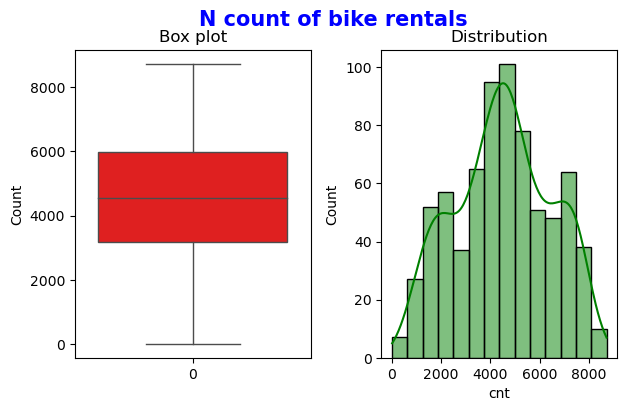

In [23]:
get_univariate_plots(bike['cnt'], 
title='N count of bike rentals ', dist_ylabel='Count', box_ylabel='Count',dist_color='green', box_color='red' )

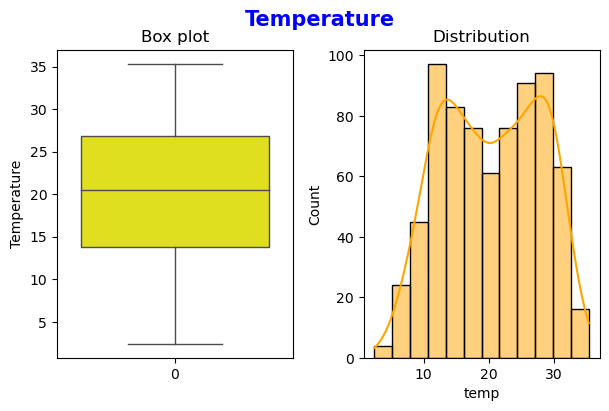

In [24]:
get_univariate_plots(bike['temp'], title='Temperature', box_ylabel='Temperature', 
dist_ylabel='Count', box_color='yellow', dist_color='orange')

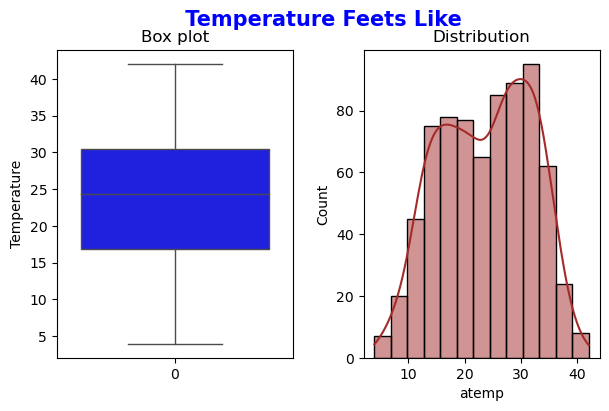

In [25]:
get_univariate_plots(bike['atemp'], title=' Temperature Feets Like', 
box_ylabel='Temperature', dist_ylabel='Count', box_color='blue', dist_color='brown')

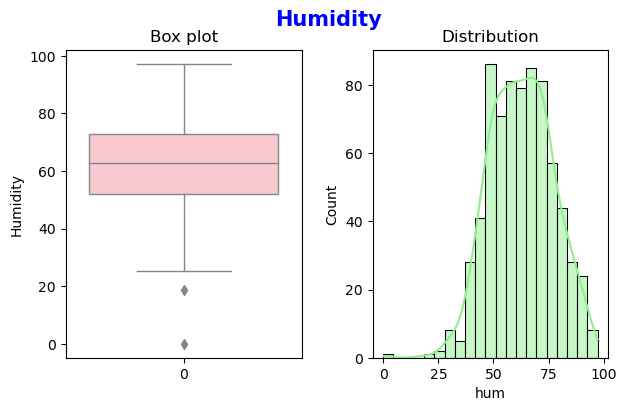

In [26]:
get_univariate_plots(bike['hum'], title='Humidity', 
box_ylabel='Humidity', dist_ylabel='Count', box_color='pink', dist_color='lightgreen')

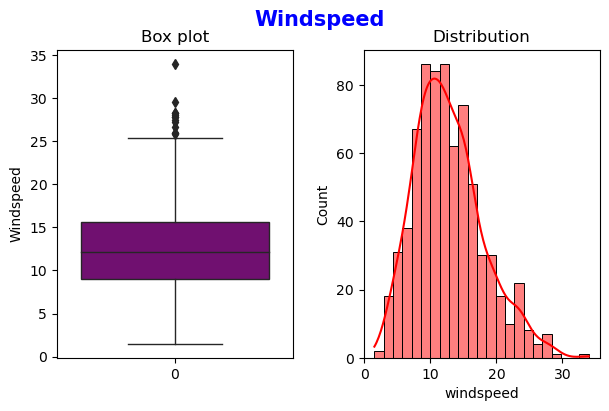

In [27]:
get_univariate_plots(bike['windspeed'], title='Windspeed', 
box_ylabel='Windspeed', dist_ylabel='Count', box_color='purple', dist_color='red')

###  Univariate analysis for Categorical data

<Figure size 200x200 with 0 Axes>

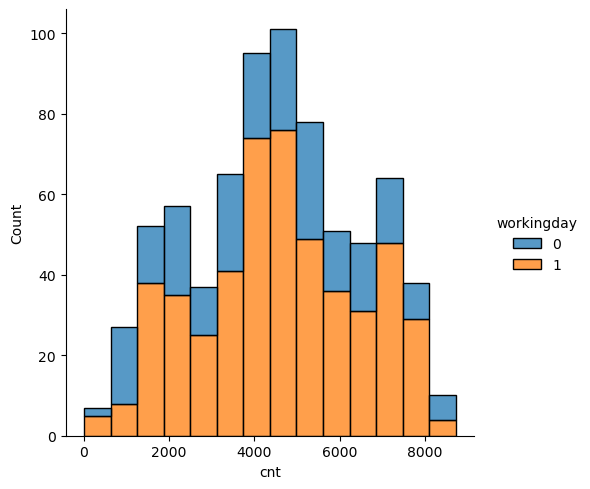

In [28]:
plt.figure(figsize=(2,2))
sns.displot(data=bike, x="cnt", hue="workingday", multiple="stack")
plt.show()

### Segmented univariate analysis

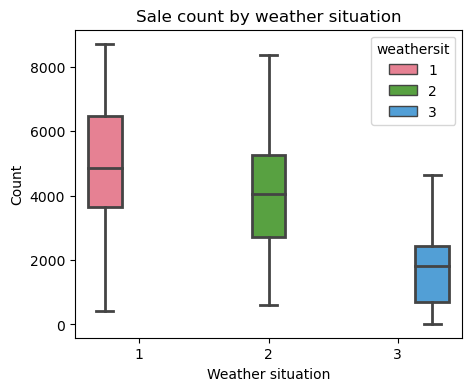

In [29]:
plt.figure(figsize=(5,4))
sns.boxplot(data=bike, x = 'weathersit', y=bike.cnt, color="lightblue", linewidth=2, palette="husl", hue ='weathersit')
plt.title("Sale count by weather situation", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Weather situation')

plt.show()

### Bivariate analysis

In [32]:
def plot_scatter(data, x, y, title='', xlabel='', ylabel='', figsize=(8, 6), color='gray'):
    sns.scatterplot(data=data, x=x, y=y, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

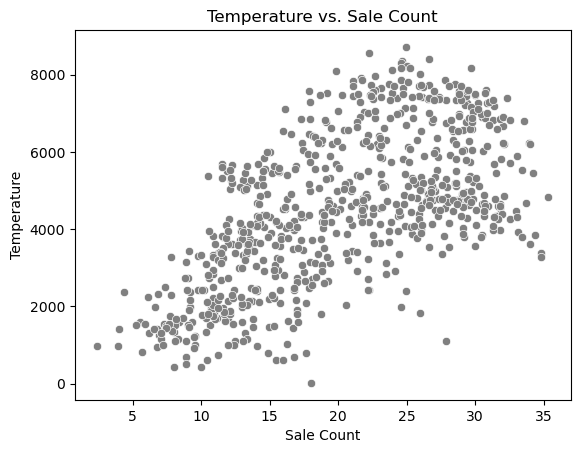

In [33]:
plot_scatter(bike, x='temp', y='cnt', title='Temperature vs. Sale Count', xlabel='Sale Count', ylabel='Temperature')

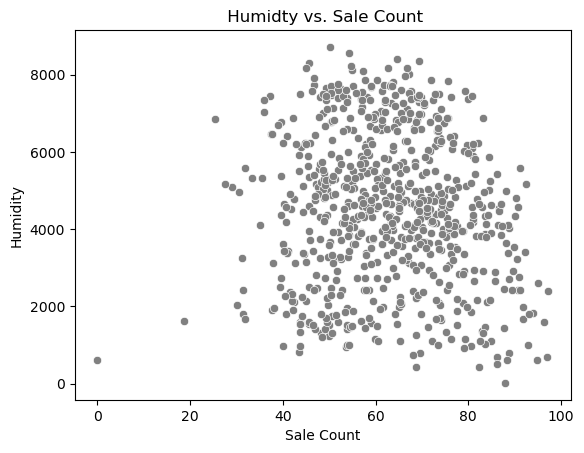

In [34]:
plot_scatter(bike, x='hum', y='cnt', title=' Humidty vs. Sale Count', xlabel='Sale Count', ylabel='Humidity')

#### Correlation between features

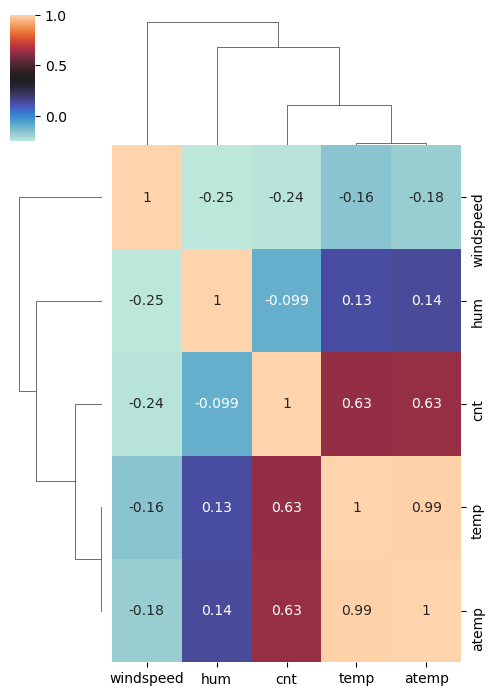

In [35]:
defaulted_entries = bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.clustermap(defaulted_entries.corr(),annot=True,figsize=(5, 7),cmap="icefire")

plt.show()


In [36]:
pd.crosstab(bike['weekday'], bike['workingday'])

workingday,0,1
weekday,,
0,105,0
1,15,90
2,1,103
3,1,102
4,2,102
5,2,102
6,105,0


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

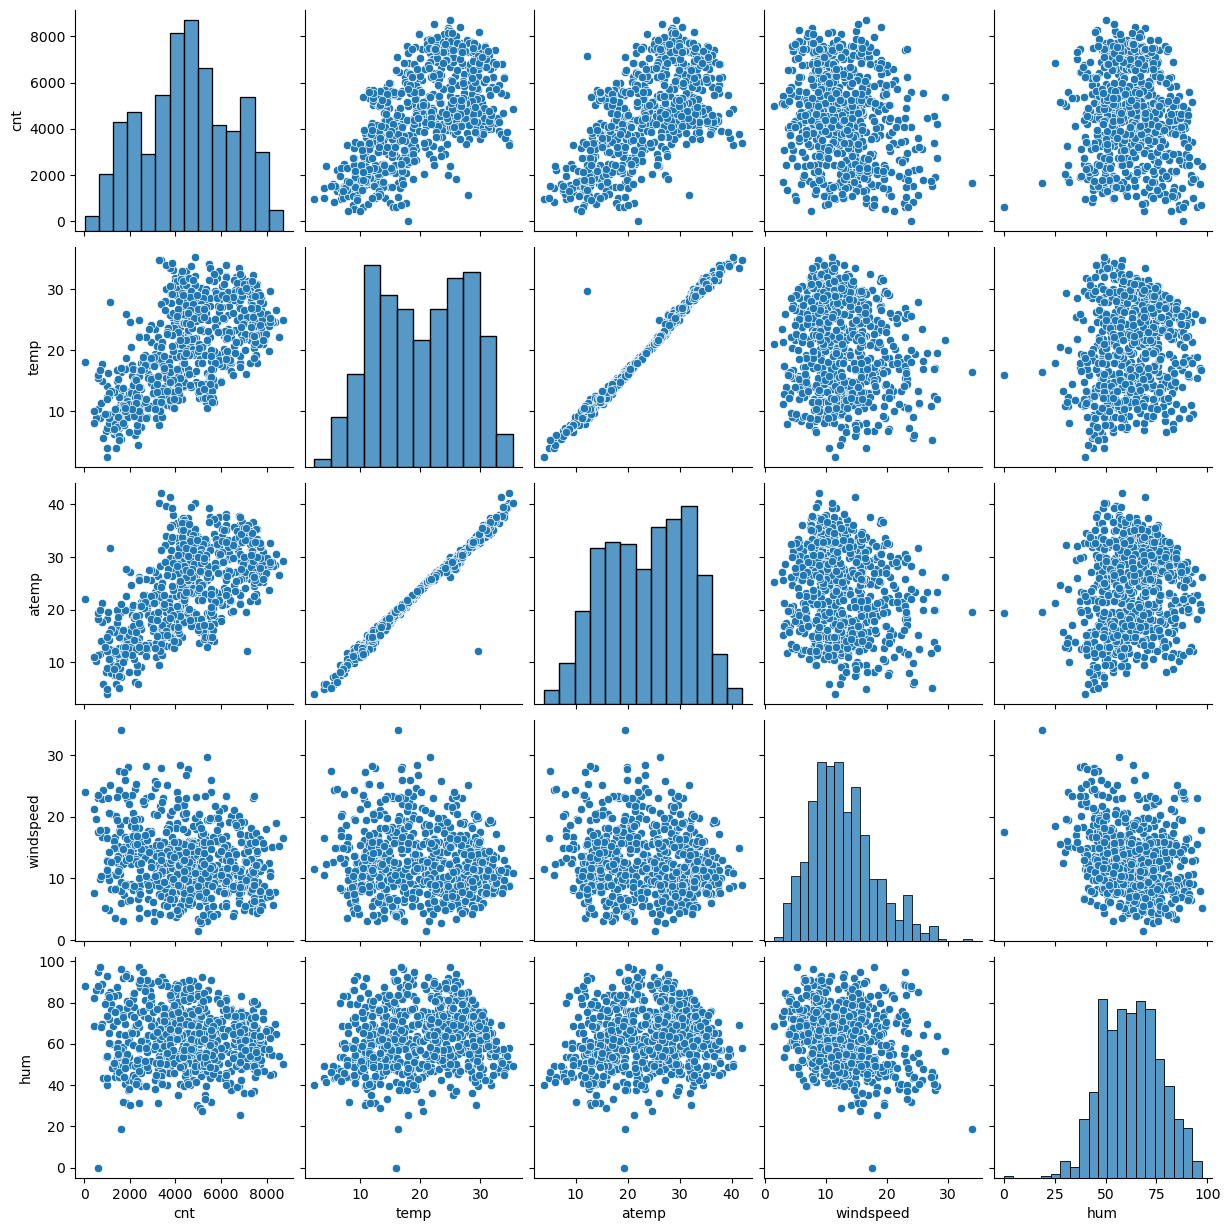

In [37]:
sns.pairplot(data=bike,vars=['cnt','temp','atemp','windspeed','hum'])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

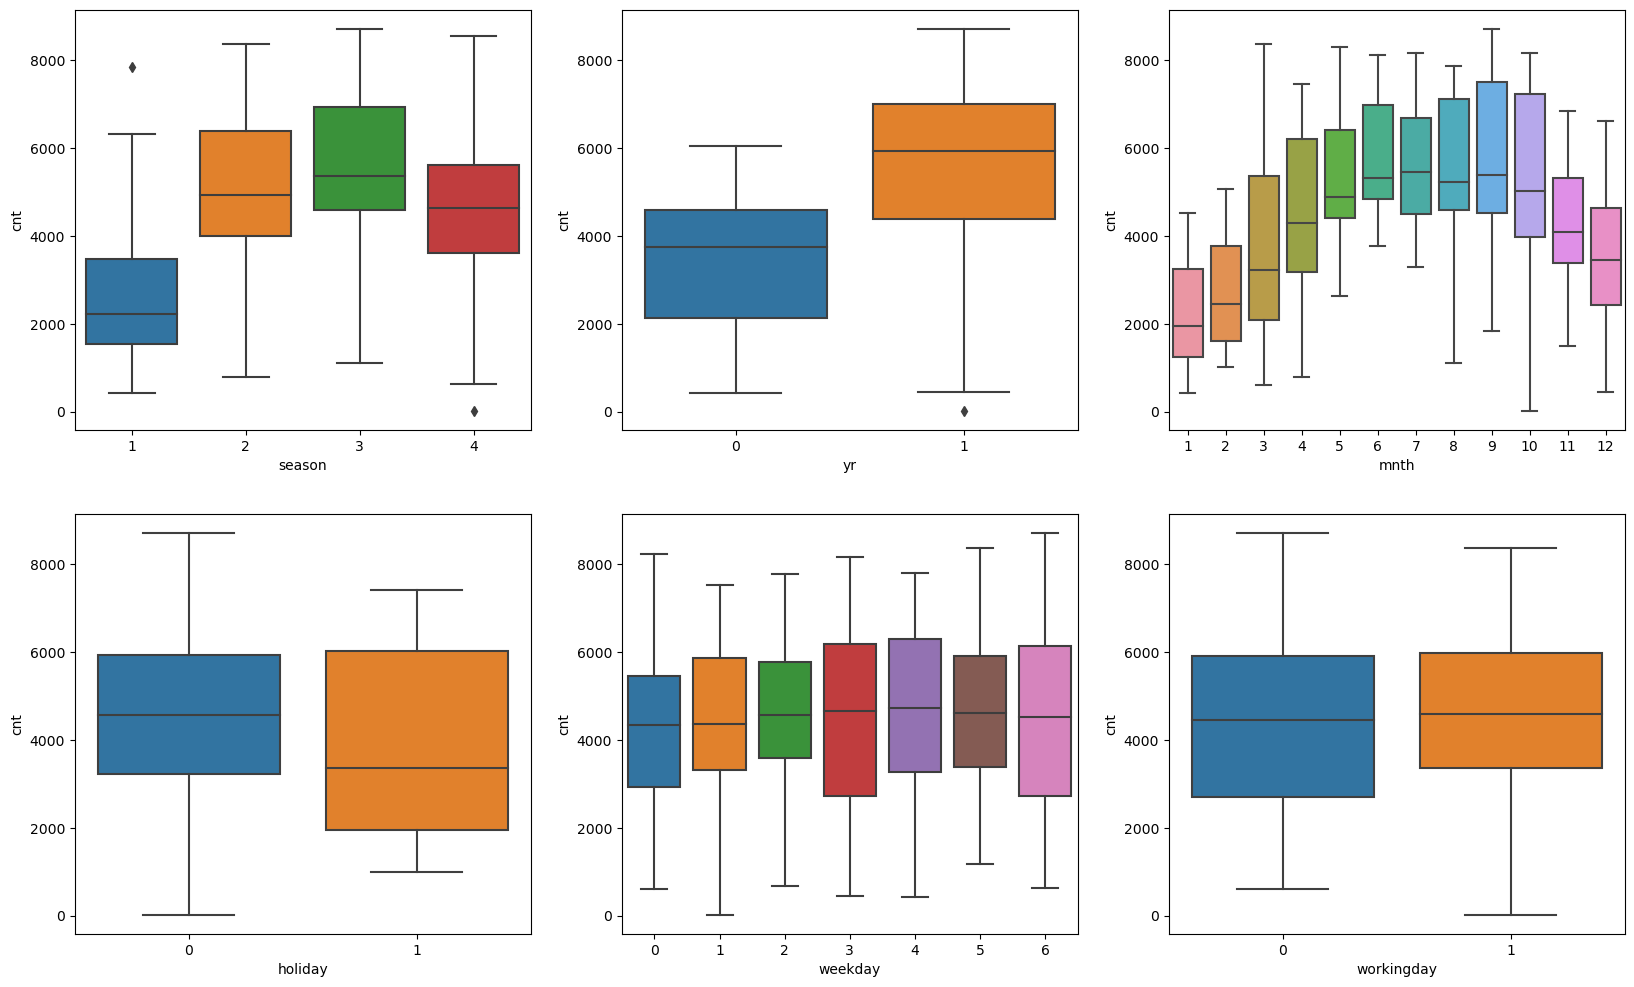

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
#plt.subplot(2,3,7)
#sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
#plt.subplot(2,3,8)
#sns.boxplot(x = 'temp', y = 'cnt', data = bike)
#plt.subplot(2,3,9)
#sns.boxplot(x = 'atemp', y = 'cnt', data = bike)
#plt.subplot(2,3,10)
#sns.boxplot(x = 'hum', y = 'cnt', data = bike)
#plt.subplot(2,3,11)
#sns.boxplot(x = 'windspeed', y = 'cnt', data = bike)
#plt.subplot(2,3,12)
#sns.boxplot(x = 'casual	', y = 'cnt', data = bike)
#plt.subplot(2,3,13)
#sns.boxplot(x = 'registered	', y = 'cnt', data = bike)
#plt.subplot(2,3,14)
#sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `holiday` as the hue.

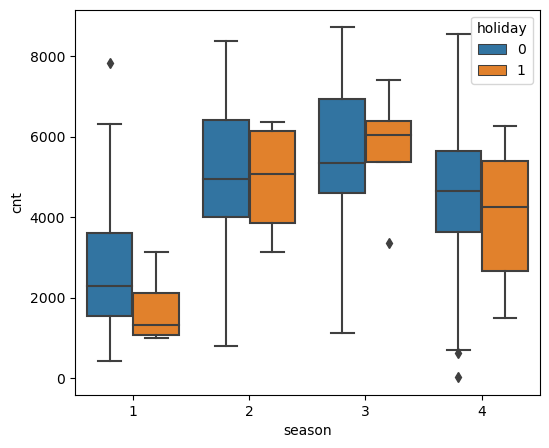

In [39]:
plt.figure(figsize = (6, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bike)
plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [40]:
# List of variables to map

varlist =  ['weathersit']

# Defining the map function
def binary_map(x):
    return x.map({1:'wsit1_clear', 2:'wsit2_mist_cloud', 3:'wsit3_light_rain_snow', 4:'wsit4_heavy_rain_snow' })

# Applying the function to the biking list
bike[varlist] = bike[varlist].apply(binary_map)



# List of variables to map

varlist =  ['season']

# Defining the map function
def binary_map(x):
    return x.map({1:'season1_spring', 2:'season2_summer', 3:'season3_fall', 4:'season4_winter'})

# Applying the function to the biking list
bike[varlist] = bike[varlist].apply(binary_map)



# List of variables to map

varlist =  ['weekday']

# Defining the map function
def binary_map(x):
    return x.map({1:'W1_monday', 2:'W2_tuesday', 3:'W3_wednesday', 4:'W4_thursday', 5:'W5_friday', 6:'W6_saturday', 0:'W7_sunday'})

# Applying the function to the biking list
bike[varlist] = bike[varlist].apply(binary_map)



# List of variables to map

varlist =  ['mnth']

# Defining the map function
def binary_map(x):
    return x.map({1:'mnth01_jan', 2:'mnth02_feb', 3:'mnth03_mar', 4:'mnth04_apr', 5:'mnth05_may', 6:'mnth06_jun', 
                  7:'mnth07_jul', 8:'mnth08_aug', 9:'mnth09_sep', 10:'mnth10_oct', 11:'mnth11_nov', 12:'mnth12_dec', })

# Applying the function to the biking list
bike[varlist] = bike[varlist].apply(binary_map)


# List of variables to map

#varlist =  ['workingday', 'holiday']

# Defining the map function
#def binary_map(x):
#    return x.map({'yes':1, "no":0 })

# Applying the function to the biking list
#bike[varlist] = bike[varlist].apply(binary_map)


In [41]:
# Check the biking dataframe now

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,season1_spring,0,mnth01_jan,0,W6_saturday,0,wsit2_mist_cloud,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,season1_spring,0,mnth01_jan,0,W7_sunday,0,wsit2_mist_cloud,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,season1_spring,0,mnth01_jan,0,W1_monday,1,wsit1_clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,season1_spring,0,mnth01_jan,0,W2_tuesday,1,wsit1_clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,season1_spring,0,mnth01_jan,0,W3_wednesday,1,wsit1_clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dummy Variables

The variables `weathersit` and `season` has four levels. The `weekday` has seven ones; while the `mnth` has 12 ones. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [42]:
# Get the dummy variables for the feature 'holiday' and store it in a new variable - 'status'
status_a = pd.get_dummies(bike['weathersit'])
status_b = pd.get_dummies(bike['season'])
status_c = pd.get_dummies(bike['weekday'])
status_d = pd.get_dummies(bike['mnth'])

In [43]:
# Check what the dataset 'status' looks like
status_a.head()

,wsit1_clear,wsit2_mist_cloud,wsit3_light_rain_snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
# Check what the dataset 'status' looks like
status_b.head()

,season1_spring,season2_summer,season3_fall,season4_winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [45]:
# Check what the dataset 'status' looks like
status_c.head()

,W1_monday,W2_tuesday,W3_wednesday,W4_thursday,W5_friday,W6_saturday,W7_sunday
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0


In [46]:
# Check what the dataset 'status' looks like
status_d.head(5)

,mnth01_jan,mnth02_feb,mnth03_mar,mnth04_apr,mnth05_may,mnth06_jun,mnth07_jul,mnth08_aug,mnth09_sep,mnth10_oct,mnth11_nov,mnth12_dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


Now, for `season` feature, the we don't need four columns. we can drop the `season1_spring` column, as the type of seasons can be identified with just the frist four columns where — 
- `100` will correspond to `season2_summer`
- `010` will correspond to `season3_fall`
- `001` will correspond to `season4_winter`

In [47]:
# Let's drop the first column from status df using 'drop_first = True'

status_a = pd.get_dummies(bike['weathersit'], drop_first = True)
status_b = pd.get_dummies(bike['season'], drop_first = True)
status_c = pd.get_dummies(bike['weekday'], drop_first = True)
status_d = pd.get_dummies(bike['mnth'], drop_first = True)

In [48]:
# Check what the dataset 'status' looks like
status_a.head()

,wsit2_mist_cloud,wsit3_light_rain_snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [49]:
# Check what the dataset 'status' looks like
status_b.head()

,season2_summer,season3_fall,season4_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [50]:
# Check what the dataset 'status' looks like
status_c.head()

,W2_tuesday,W3_wednesday,W4_thursday,W5_friday,W6_saturday,W7_sunday
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [51]:
# Check what the dataset 'status' looks like
status_d.head()

,mnth02_feb,mnth03_mar,mnth04_apr,mnth05_may,mnth06_jun,mnth07_jul,mnth08_aug,mnth09_sep,mnth10_oct,mnth11_nov,mnth12_dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Add the results to the original dataframe

bike = pd.concat([bike, status_a], axis = 1)
bike = pd.concat([bike, status_b], axis = 1)
bike = pd.concat([bike, status_c], axis = 1)
bike = pd.concat([bike, status_d], axis = 1)

In [53]:
# Now let's see the head of our dataframe.

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth03_mar,mnth04_apr,mnth05_may,mnth06_jun,mnth07_jul,mnth08_aug,mnth09_sep,mnth10_oct,mnth11_nov,mnth12_dec
0,1,01-01-2018,season1_spring,0,mnth01_jan,0,W6_saturday,0,wsit2_mist_cloud,14.110847,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,season1_spring,0,mnth01_jan,0,W7_sunday,0,wsit2_mist_cloud,14.902598,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,season1_spring,0,mnth01_jan,0,W1_monday,1,wsit1_clear,8.050924,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,season1_spring,0,mnth01_jan,0,W2_tuesday,1,wsit1_clear,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,season1_spring,0,mnth01_jan,0,W3_wednesday,1,wsit1_clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [54]:
bike.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth03_mar,mnth04_apr,mnth05_may,mnth06_jun,mnth07_jul,mnth08_aug,mnth09_sep,mnth10_oct,mnth11_nov,mnth12_dec
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,...,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,...,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Drop 'weathersit' and other three as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)
bike.drop(['season'], axis = 1, inplace = True)
bike.drop(['weekday'], axis = 1, inplace = True)
bike.drop(['mnth'], axis = 1, inplace = True)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [56]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `hum`, `windspeed`, ect., all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['workingday', 'temp', 'atemp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_train.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth03_mar,mnth04_apr,mnth05_may,mnth06_jun,mnth07_jul,mnth08_aug,mnth09_sep,mnth10_oct,mnth11_nov,mnth12_dec
653,654,16-10-2019,1,0,1.0,0.509887,0.501133,0.575354,0.300794,922,...,0,0,0,0,0,0,0,1,0,0
576,577,31-07-2019,1,0,1.0,0.815169,0.766351,0.725633,0.264686,968,...,0,0,0,0,1,0,0,0,0,0
426,427,03-03-2019,1,0,0.0,0.442393,0.438975,0.640189,0.255342,956,...,1,0,0,0,0,0,0,0,0,0
728,729,30-12-2019,1,0,0.0,0.245101,0.200348,0.498067,0.663106,364,...,0,0,0,0,0,0,0,0,0,1
482,483,28-04-2019,1,0,0.0,0.395666,0.391735,0.504508,0.188475,1120,...,0,1,0,0,0,0,0,0,0,0


In [61]:
df_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth03_mar,mnth04_apr,mnth05_may,mnth06_jun,mnth07_jul,mnth08_aug,mnth09_sep,mnth10_oct,mnth11_nov,mnth12_dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.941176,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,209.868619,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,553.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


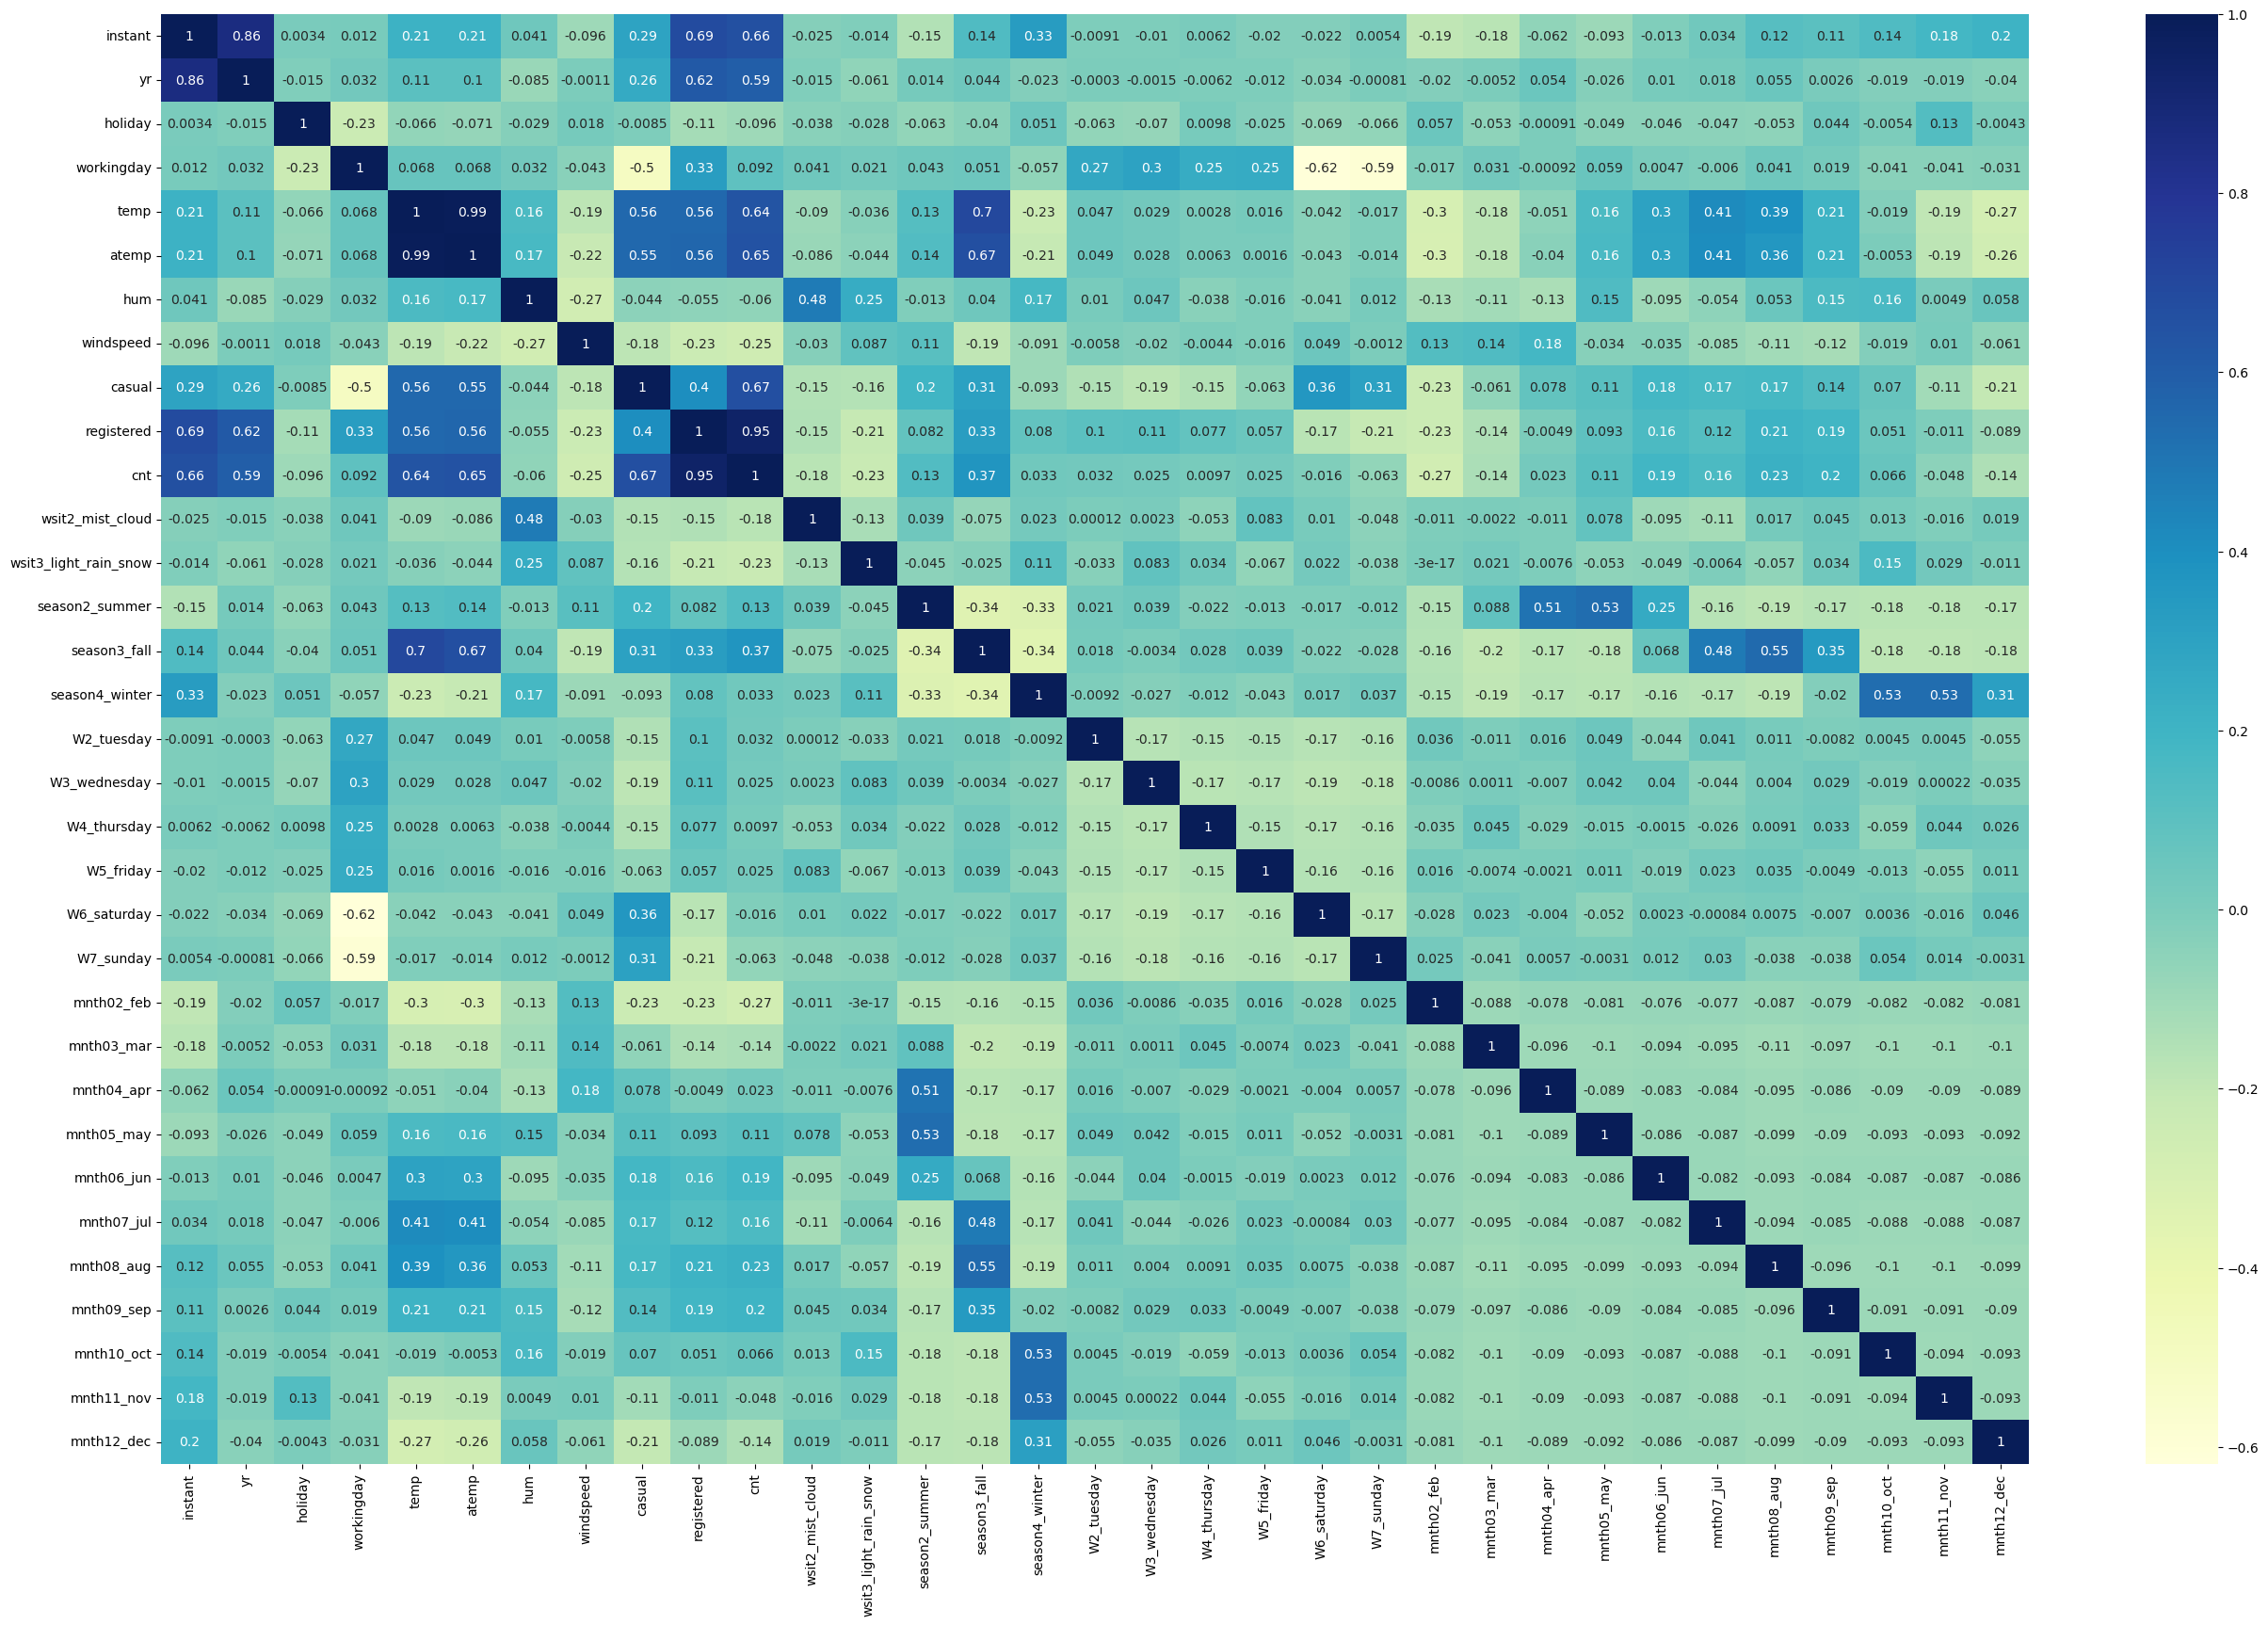

In [62]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `atemp` seems to the correlated to `CNT` the most. Let's see a pairplot for `atemp` vs `CNT`.

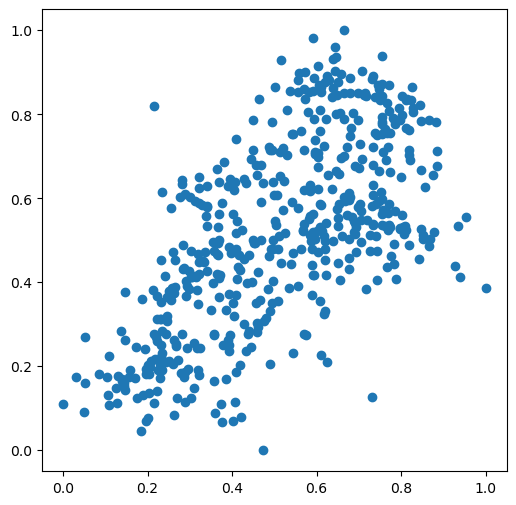

In [63]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [64]:
y_train = df_train.pop('cnt')
X_train = df_train

In [65]:
y_train.describe()

count    510.000000
mean       0.513620
std        0.224593
min        0.000000
25%        0.356420
50%        0.518638
75%        0.684710
max        1.000000
Name: cnt, dtype: float64

In [66]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

## Building a new model with Recursive feature elimination (RFE)
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

 RFE
 

In [692]:
### Dividing into X and Y sets for the model building
#This process has been done. Don't need to repeat
#y_train = df_train.pop('cnt')
#X_train = df_train

In [67]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Adding all the variables to the model

In [68]:
X_train.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'wsit2_mist_cloud',
       'wsit3_light_rain_snow', 'season2_summer', 'season3_fall',
       'season4_winter', 'W2_tuesday', 'W3_wednesday', 'W4_thursday',
       'W5_friday', 'W6_saturday', 'W7_sunday', 'mnth02_feb', 'mnth03_mar',
       'mnth04_apr', 'mnth05_may', 'mnth06_jun', 'mnth07_jul', 'mnth08_aug',
       'mnth09_sep', 'mnth10_oct', 'mnth11_nov', 'mnth12_dec'],
      dtype='object')

In [69]:
# Assign all the feature variables to X
X_train_select = X_train[['yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'wsit2_mist_cloud',
       'wsit3_light_rain_snow', 'season2_summer', 'season3_fall',
       'season4_winter', 'W2_tuesday', 'W3_wednesday', 'W4_thursday',
       'W5_friday', 'W6_saturday', 'W7_sunday', 'mnth02_feb', 'mnth03_mar',
       'mnth04_apr', 'mnth05_may', 'mnth06_jun', 'mnth07_jul', 'mnth08_aug',
       'mnth09_sep', 'mnth10_oct', 'mnth11_nov', 'mnth12_dec']]
       

In [70]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_select, y_train)

rfe = RFE(lm, n_features_to_select=15, step=1)             # running RFE
rfe = rfe.fit(X_train_select, y_train)

In [71]:
list(zip(X_train_select.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('wsit2_mist_cloud', True, 1),
 ('wsit3_light_rain_snow', True, 1),
 ('season2_summer', True, 1),
 ('season3_fall', True, 1),
 ('season4_winter', True, 1),
 ('W2_tuesday', False, 15),
 ('W3_wednesday', False, 8),
 ('W4_thursday', False, 9),
 ('W5_friday', False, 6),
 ('W6_saturday', True, 1),
 ('W7_sunday', False, 7),
 ('mnth02_feb', False, 5),
 ('mnth03_mar', False, 2),
 ('mnth04_apr', False, 4),
 ('mnth05_may', False, 3),
 ('mnth06_jun', False, 13),
 ('mnth07_jul', True, 1),
 ('mnth08_aug', False, 14),
 ('mnth09_sep', True, 1),
 ('mnth10_oct', True, 1),
 ('mnth11_nov', False, 12),
 ('mnth12_dec', False, 11)]

In [72]:
col = X_train_select.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'wsit2_mist_cloud', 'wsit3_light_rain_snow', 'season2_summer',
       'season3_fall', 'season4_winter', 'W6_saturday', 'mnth07_jul',
       'mnth09_sep', 'mnth10_oct'],
      dtype='object')

In [73]:
X_train_select.columns[~rfe.support_]

Index(['atemp', 'W2_tuesday', 'W3_wednesday', 'W4_thursday', 'W5_friday',
       'W7_sunday', 'mnth02_feb', 'mnth03_mar', 'mnth04_apr', 'mnth05_may',
       'mnth06_jun', 'mnth08_aug', 'mnth11_nov', 'mnth12_dec'],
      dtype='object')

### Building the model using statsmodel, for the detailed statistics

In [74]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_select[col]

In [75]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [76]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [77]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.29e-191
Time:                        12:04:23   Log-Likelihood:                 520.48
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Dropping the variable and updating the model if the ones with p-values are less than 0.05

As you can see from the summary, so far it looks p-values all less than 0.05. Thus, no variables will be dropped at this time.

In [78]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'wsit2_mist_cloud', 'wsit3_light_rain_snow', 'season2_summer',
       'season3_fall', 'season4_winter', 'W6_saturday', 'mnth07_jul',
       'mnth09_sep', 'mnth10_oct'],
      dtype='object')

In [79]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

## Step 6: Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.75
4,hum,17.56
9,season3_fall,7.30
2,workingday,5.06
5,windspeed,3.88
8,season2_summer,3.48
10,season4_winter,2.87
6,wsit2_mist_cloud,2.14
0,yr,2.04
11,W6_saturday,1.90


### Dropping the variable and updating the model


Rebuilding the model without `temp` due to high multi-collinearity

In [81]:
X = X.drop('temp', 1)


# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     125.2
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.80e-152
Time:                        12:04:35   Log-Likelihood:                 424.35
No. Observations:                 510   AIC:                            -818.7
Df Residuals:                     495   BIC:                            -755.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [83]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.20
2,workingday,5.01
4,windspeed,3.82
8,season3_fall,3.14
9,season4_winter,2.70
7,season2_summer,2.04
0,yr,1.98
5,wsit2_mist_cloud,1.98
10,W6_saturday,1.90
13,mnth10_oct,1.58


As you might have noticed, dropping `temp` decreased the VIF of `hum` and `workingday` as well such that however it is still greater than 5. But from the summary, we can still see some of them have a high p-value.  For instance, `jul` has a p-value of 0.744. We should drop this variable as well.

#### `jul` is insignificant in presence of other variables; can be dropped.

#### Rebuilding the model without `jul`. 

In [84]:
X = X.drop('mnth07_jul', 1)


# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()


In [85]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.60e-153
Time:                        12:04:41   Log-Likelihood:                 424.30
No. Observations:                 510   AIC:                            -820.6
Df Residuals:                     496   BIC:                            -761.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [86]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.20
2,workingday,5.00
4,windspeed,3.82
9,season4_winter,2.69
8,season3_fall,2.43
7,season2_summer,2.04
0,yr,1.98
5,wsit2_mist_cloud,1.97
10,W6_saturday,1.90
12,mnth10_oct,1.58


#### `hum` is insignificant in presence of other variables; can be dropped.

#### Rebuilding the model without `hum`

In [87]:
X = X.drop('hum', 1)


# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [88]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.55e-154
Time:                        12:04:49   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [89]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.88
3,windspeed,3.42
8,season4_winter,2.25
7,season3_fall,1.97
0,yr,1.94
6,season2_summer,1.76
9,W6_saturday,1.67
11,mnth10_oct,1.57
4,wsit2_mist_cloud,1.53
10,mnth09_sep,1.28


#### `holiday` is insignificant in presence of other variables; can be dropped.

#### Rebuilding the model without `holiday`

In [90]:
X = X.drop('holiday', 1)


# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [91]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          4.56e-155
Time:                        12:04:55   Log-Likelihood:                 422.73
No. Observations:                 510   AIC:                            -821.5
Df Residuals:                     498   BIC:                            -770.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [92]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.64
2,windspeed,3.27
7,season4_winter,2.21
6,season3_fall,1.96
0,yr,1.94
5,season2_summer,1.76
8,W6_saturday,1.61
10,mnth10_oct,1.57
3,wsit2_mist_cloud,1.53
9,mnth09_sep,1.28


Now this model looks good at all p-values and VIFs

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [93]:
y_train_CNT = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

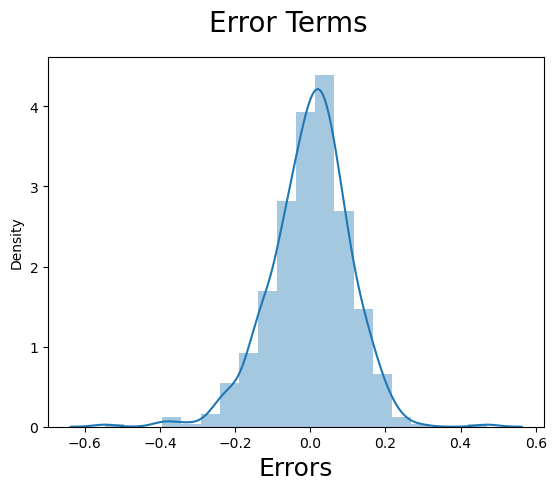

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_CNT), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [1004]:
#this scaling had been applied in the beginning, I won't use it again
#num_vars = ['workingday', 'temp', 'atemp','hum', 'windspeed', 'cnt']

#df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [95]:
y_test = df_test.pop('cnt')
X_test = df_test

In [96]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [97]:
y_test.describe()

count    219.000000
mean       0.520592
std        0.218435
min        0.048205
25%        0.377531
50%        0.524275
75%        0.672745
max        0.963300
Name: cnt, dtype: float64

In [98]:
X_test.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth03_mar,mnth04_apr,mnth05_may,mnth06_jun,mnth07_jul,mnth08_aug,mnth09_sep,mnth10_oct,mnth11_nov,mnth12_dec
184,185,04-07-2018,0,1,0.0,0.831783,0.769660,0.657364,0.084219,3065,...,0,0,0,0,1,0,0,0,0,0
535,536,20-06-2019,1,0,1.0,0.901354,0.842587,0.610133,0.153728,872,...,0,0,0,1,0,0,0,0,0,0
299,300,27-10-2018,0,0,1.0,0.511964,0.496145,0.837699,0.334206,240,...,0,0,0,0,0,0,0,1,0,0
221,222,10-08-2018,0,0,1.0,0.881625,0.795343,0.437098,0.339570,884,...,0,0,0,0,0,1,0,0,0,0
152,153,02-06-2018,0,0,1.0,0.817246,0.741471,0.314298,0.537414,736,...,0,0,0,1,0,0,0,0,0,0


In [99]:
X_test.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth03_mar,mnth04_apr,mnth05_may,mnth06_jun,mnth07_jul,mnth08_aug,mnth09_sep,mnth10_oct,mnth11_nov,mnth12_dec
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,356.776256,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,875.968037,3671.013699,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,213.665198,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,712.783588,1509.322560,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,4.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,9.000000,432.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,336.500000,2507.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,736.000000,3667.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,537.500000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1190.000000,4624.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,3410.000000,6844.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)

In [100]:
# Adding constant variable to test dataframe
import statsmodels.api as sm

X_test_m4 = sm.add_constant(X_test)

In [101]:
X_test.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'wsit2_mist_cloud',
       'wsit3_light_rain_snow', 'season2_summer', 'season3_fall',
       'season4_winter', 'W2_tuesday', 'W3_wednesday', 'W4_thursday',
       'W5_friday', 'W6_saturday', 'W7_sunday', 'mnth02_feb', 'mnth03_mar',
       'mnth04_apr', 'mnth05_may', 'mnth06_jun', 'mnth07_jul', 'mnth08_aug',
       'mnth09_sep', 'mnth10_oct', 'mnth11_nov', 'mnth12_dec'],
      dtype='object')

In [102]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['instant', 'dteday', 'holiday', 'temp',  'hum', 'casual', 'registered', 'mnth07_jul',
                            'atemp', 'W2_tuesday', 'W3_wednesday', 'W4_thursday', 'W5_friday',
       'W7_sunday', 'mnth02_feb', 'mnth03_mar', 'mnth04_apr', 'mnth05_may',
       'mnth06_jun', 'mnth08_aug', 'mnth11_nov', 'mnth12_dec'], axis = 1)

In [103]:
X_test_m4.head()

,const,yr,workingday,windspeed,wsit2_mist_cloud,wsit3_light_rain_snow,season2_summer,season3_fall,season4_winter,W6_saturday,mnth09_sep,mnth10_oct
184,1.0,0,0.0,0.084219,1,0,0,1,0,0,0,0
535,1.0,1,1.0,0.153728,0,0,1,0,0,0,0,0
299,1.0,0,1.0,0.334206,1,0,0,0,1,0,0,1
221,1.0,0,1.0,0.339570,0,0,0,1,0,0,0,0
152,1.0,0,1.0,0.537414,0,0,1,0,0,0,0,0


In [104]:
X_test_m4.describe()

,const,yr,workingday,windspeed,wsit2_mist_cloud,wsit3_light_rain_snow,season2_summer,season3_fall,season4_winter,W6_saturday,mnth09_sep,mnth10_oct
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.479452,0.698630,0.313350,0.319635,0.027397,0.264840,0.246575,0.232877,0.118721,0.086758,0.082192
std,0.0,0.500722,0.459904,0.159947,0.467403,0.163612,0.442259,0.432005,0.423633,0.324202,0.282125,0.275286
min,1.0,0.000000,0.000000,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,1.000000,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.403048,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
# Making predictions using the eighth model

y_pred_m4 = lr_4.predict(X_test_m4)

#y_pred_m4 = lr_4.predict(X_test_m4[:, [0,1,2,3,4,6]])

After the model building and residual analysis were done, the test set was used for the predictions. The following two lines of code was used to calculate the R-squared score on the test set.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
 
where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
- Reminder: Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [106]:
#from sklearn.metrics import r2_score
#r2_score(y_test, y_pred)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.771493506982235

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

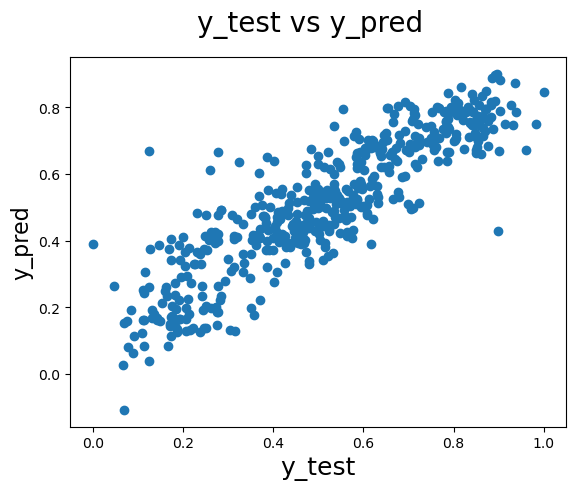

In [107]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_CNT)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

- According to the results, the equation of our best fitted line is:
$CNT = (-0.317)\times light.rain.snow + (-0.175)\times windspeed + (-0.093)\times mist.cloud + 0.058\times workingday + 0.066\times Saturday + 0.082\times sep + 0.098\times oct + 0.190\times winter + 0.248 \times yr + 0.255\times summer + 0.294\times fall $

- Overall, we have a decent model with the values of R^2 at 77.8% in training data and at 77.1% in test data.   
- The following conclusions are based on the results of the analysis with 11 features, which all together have significant contributions to the model. In other words, the following factors might booster the sales of the bike sharing. 
  1.	When weather conditions are: no light rain/snow, no mist/cloud, or having a lower windspeed, the sales are likely much better.
  2.	During the seasons in summer, fall, or winter, the sales are better except in spring.
  3.	In September and October, the sale trends are doing better. 
  4.	During working days and Saturdays, the sales tend to be good. 
  5.	The sales in year 2019 are better than the ones in 2018. Following the sale trend, the sales in following years are likely doing better.